# Лабораторная работа №2

### Описание датасета
- `country`: The country that the wine is from
- `description`: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.
- `designation`: The vineyard within the winery where the grapes that made the wine are from
- `points`: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score &gt;=80)
- `price`: The cost for a bottle of the wine
- `province`: The province or state that the wine is from
- `region_1`: The wine growing area in a province or state (ie Napa)
- `region_2`: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
- `variety`: The type of grapes used to make the wine (ie Pinot Noir)
- `winery`: The winery that made the wine


### Задачи
#### 1. Типы данных и создание новых переменных
- Определите и классифицируйте типы данных каждого столбца в наборе данных. 
- Какие из них категориальные? 
- Какие числовые?
- Создайте новую переменную цена_за_балл, разделив цену на оценку, чтобы анализировать соотношение цены и качества вин.

#### 2. Генеральная совокупность и выборка, частотные таблицы и распределения
- Сформируйте частотную таблицу для переменной 'страна', чтобы увидеть количество отзывов по каждой стране.
- Выберите случайную выборку из 100 строк и сравните среднюю цену с ценой по всему набору данных. 
- Хорошо ли выборка представляет собой всю совокупность?

#### 3. Описательные статистики
- Рассчитайте описательные статистики для числовых переменных (среднее, медиана, мода, размах, дисперсия и стандартное отклонение).
- Обсудите, какая мера центральной тенденции лучше всего описывает переменные оценки и цена и почему.

#### 4. Z-оценка и выбросы
- Рассчитайте Z-баллы для переменной цена, чтобы определить выбросы. 
- Какой порог вы бы использовали и почему?
- Как выбросы влияют на набор данных? 
- Следует ли их удалять или оставить для анализа?

#### 5. Корреляция
- Вычислите матрицу корреляции для числовых переменных. 
- Какие пары показывают наивысшую корреляцию?

#### 6. Введение в визуализацию данных
- Создайте гистограмму для переменной оценки и диаграмму размаха для переменной цена.

#### 7. Продвинутая визуализация данных
- Постройте диаграмму рассеяния, чтобы визуализировать взаимосвязь между ценой и оценками. 
- Используйте цветовую кодировку, чтобы различать страны.

#### 8. Введение в тестирование гипотез, непараметрические критерии
- Проведите тест Манна-Уитни для сравнения распределения оценок между винами из США и Франции. 
- Что можно сделать вывод из результатов?

#### 9. Параметрические критерии для тестирования гипотез
- Выполните t-тест для сравнения средней цены вин из Калифорнии и Орегона. 
- Существенно ли они различаются?

#### 10. Линейная регрессия
- Постройте модель линейной регрессии для прогнозирования цены на основе оценок. 
- Каково значение R² и как оно интерпретируется?

#### 11. Логистическая регрессия
- Используя логистическую регрессию, предскажите, является ли вино из США на основе его оценок и цены. 
- Обсудите точность модели.

#### 12. Задача классификации
- Постройте классификатор дерева решений, чтобы различать красные и белые вина, используя подходящие характеристики из набора данных.

---
## Подключение библиотек и датасета

In [41]:
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
# from scipy.stats import mannwhitneyu

relative_path = "winemag-data_first150k.csv"
absolute_path = os.path.abspath(relative_path)

wine_dataset_original = pd.read_csv(absolute_path, sep = ',')
wine_dataset_original.head()

wine_dataset = wine_dataset_original.dropna(subset=['price'])
wine_dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## 1. Типы данных и создание новых переменных
- Определите и классифицируйте типы данных каждого столбца в наборе данных. 
- Какие из них категориальные? 
- Какие числовые?
- Создайте новую переменную цена_за_балл, разделив цену на оценку, чтобы анализировать соотношение цены и качества вин.

In [42]:
# Типы данных
print(wine_dataset.dtypes[1:].to_string())

# Категориальные переменные
categorical_vars = wine_dataset.select_dtypes(include=['object']).columns
print("\nКатегориальные переменные:")
for cat in categorical_vars: 
    print(cat)

# Числовые переменные
numeric_vars = wine_dataset.select_dtypes(include=['float64', 'int64']).columns
print("\nЧисловые переменные:")
for num in numeric_vars[1:]: 
    print(num)

# Новая переменная price_per_point
wine_dataset.insert(11,'price_per_point', wine_dataset['price'] / wine_dataset['points'], False)
wine_dataset.head()

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object

Категориальные переменные:
country
description
designation
province
region_1
region_2
variety
winery

Числовые переменные:
points
price


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,price_per_point
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,2.447917
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,1.145833
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0.937500
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0.677083
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0.694737


## 2. Генеральная совокупность и выборка, частотные таблицы и распределения
- Сформируйте частотную таблицу для переменной 'страна', чтобы увидеть количество отзывов по каждой стране.
- Выберите случайную выборку из 100 строк и сравните среднюю цену с ценой по всему набору данных. 
- Хорошо ли выборка представляет собой всю совокупность?

In [43]:
# Частотная таблица для переменной 'country'
country_counts = wine_dataset['country'].value_counts().to_string()
print(country_counts)

# Случайная выборка из 100 строк
sample = wine_dataset.sample(n=100, random_state=42)
sample_mean_price = sample['price'].mean()
overall_mean_price = wine_dataset['price'].mean()

print(f"\nСредняя цена в выборке: {sample_mean_price:.2f}")
print(f"Средняя цена в наборе данных: {overall_mean_price:.2f}")
print(f"Отношение средней цены в выборке к средней цене в наборе: {sample_mean_price/overall_mean_price:.2f}")

US                        62139
Italy                     18784
France                    14785
Spain                      8160
Chile                      5766
Argentina                  5587
Australia                  4894
Portugal                   4176
New Zealand                3070
Austria                    2483
Germany                    2347
South Africa               2237
Greece                      872
Israel                      610
Hungary                     230
Canada                      194
Romania                     139
Uruguay                      85
Croatia                      83
Slovenia                     81
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       50
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
Luxembou

30.38/33.13 * 100% = 92%

Несмотря на близость результатов, стоит заметить, что выборка 100 из 150 000 слишком маленькая, чтобы быть репрезентативной, из-за возможного отсутствия точности при выборе другой сотни строк

## 3. Описательные статистики
- Рассчитайте описательные статистики для числовых переменных (среднее, медиана, мода, размах, дисперсия и стандартное отклонение).
- Обсудите, какая мера центральной тенденции лучше всего описывает переменные оценки и цены и почему.

In [44]:
# Описательные статистики для числовых переменных
numeric_vars = wine_dataset.select_dtypes(include=['float64', 'int64']).columns[1:]

means = wine_dataset[numeric_vars].mean()
medians = wine_dataset[numeric_vars].median()
modes = wine_dataset[numeric_vars].mode().iloc[0]
ranges = wine_dataset[numeric_vars].max() - wine_dataset[numeric_vars].min()
variances = wine_dataset[numeric_vars].var()
std_devs = wine_dataset[numeric_vars].std()

print("\nСреднее значение:")
print(means.to_string())

print("\nМедиана:")
print(medians.to_string())

print("\nМода:")
print(modes.to_string())

print("\nРазмах:")
print(ranges.to_string())

print("\nДисперсия:")
print(variances.to_string())

print("\nСтандартное отклонение:")
print(std_devs.to_string())


Среднее значение:
points             87.787919
price              33.131482
price_per_point     0.371145

Медиана:
points             88.000000
price              24.000000
price_per_point     0.275862

Мода:
points             87.000000
price              20.000000
price_per_point     0.229885

Размах:
points               20.000000
price              2296.000000
price_per_point      23.185812

Дисперсия:
points               10.379224
price              1319.326636
price_per_point       0.148330

Стандартное отклонение:
points              3.221680
price              36.322536
price_per_point     0.385137


**points**: размах данной переменной - 20 и судя по тому, что минимальное значение указано как 80, а в целом результат оценки находится в промежутке от 1 до 100 логично предположить, что рассматриваются только значения от 80 до 100, причем только целые. Среднее значение, медиана и мода близки друг к другу и могут быть рассмотрены как подходящие меры центральной тенденции, однако больше всего подходят медиана и мода, т.к. в оценке используются именно целые значения


**price**: размах этой переменной гораздо больше, чем у прошлой и можно заметить, что стандартное отклонение значительное, поэтому в качестве подходящей меры центральной тенденции стоит рассмотреть медиану

## 4. Z-оценка и выбросы
- Рассчитайте Z-баллы для переменной цена, чтобы определить выбросы. 
- Какой порог вы бы использовали и почему?
- Как выбросы влияют на набор данных? 
- Следует ли их удалять или оставить для анализа?

In [45]:
# Вычисление Z-оценок для переменной "price"
z_scores = (wine_dataset['price'] - wine_dataset['price'].mean()) / wine_dataset['price'].std()

# Определение выбросов с использованием порога в 2.5 стандартных отклонений
outliers = (z_scores < -2.5) | (z_scores > 2.5)

# Вывод количества выбросов
print(f"Количество выбросов: {outliers.sum()}")

# Удаление выбросов
wine_dataset_cleaned = wine_dataset.loc[~outliers]

Количество выбросов: 2475


Влияние выбросов на набор данных:
Выбросы могут существенно повлиять на различные статистические характеристики набора данных, такие как:
- Среднее значение - может быть сильно смещено в сторону выбросов
- Дисперсия и стандартное отклонение - могут быть завышены из-за влияния выбросов
- Корреляции между переменными - могут быть искажены

Следовательно, выбросы могут серьезно исказить результаты последующего анализа данных.

## 5. Корреляция
- Вычислите матрицу корреляции для числовых переменных. 
- Какие пары показывают наивысшую корреляцию?

                   points     price  price_per_point
points           1.000000  0.554296         0.515991
price            0.554296  1.000000         0.998336
price_per_point  0.515991  0.998336         1.000000


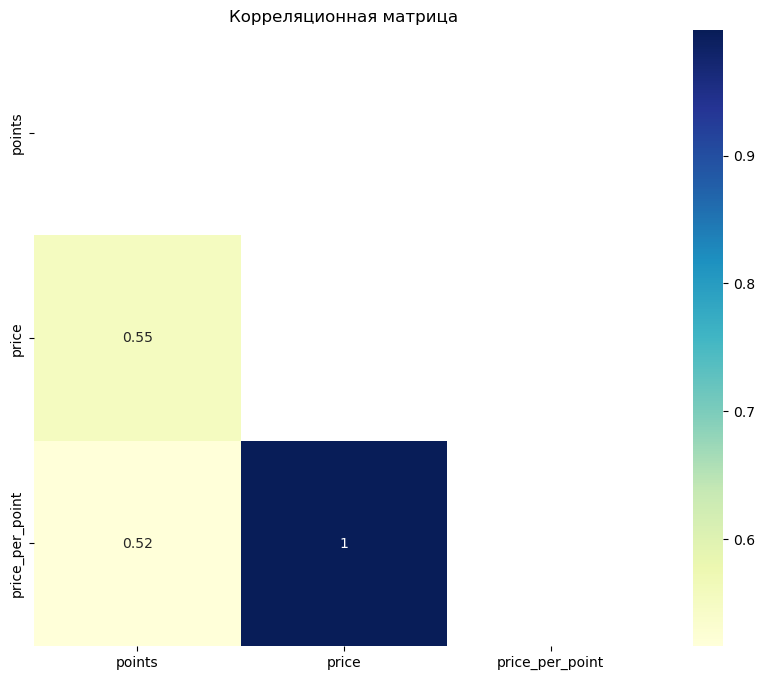

In [46]:
# Матрица корреляции для числовых переменных
corr_matrix = wine_dataset_cleaned[numeric_vars].corr()
print(corr_matrix)

# Матрица-маска для того, чтобы оставить только один треугольник (в данном случае нижний), 
# т.к. главная диагональ не содержит важной информации а относительно диагонали значения симметричны
mask_matrix = np.triu(wine_dataset_cleaned[numeric_vars].corr())
plt.figure(figsize=(10, 8))
plt.title('Корреляционная матрица')
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", mask=mask_matrix)
plt.show()

- **price & points** - 0.55 наблюдается умеренная положительная корреляция
- **price & price_per_point** - 0.99 наблюдается очень сильная положительная корреляция
- **points & price_per_point** - 0.52 наблюдается умеренная положительная корреляция

## 6. Введение в визуализацию данных
- Создайте гистограмму для переменной оценки и диаграмму размаха для переменной цена.

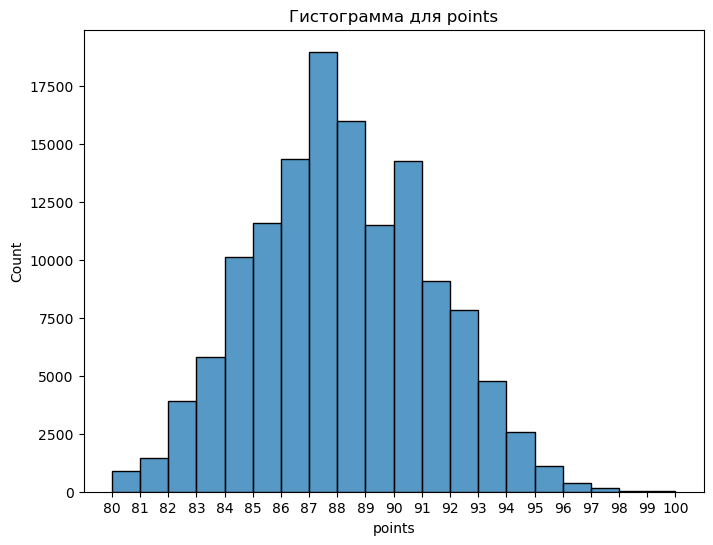

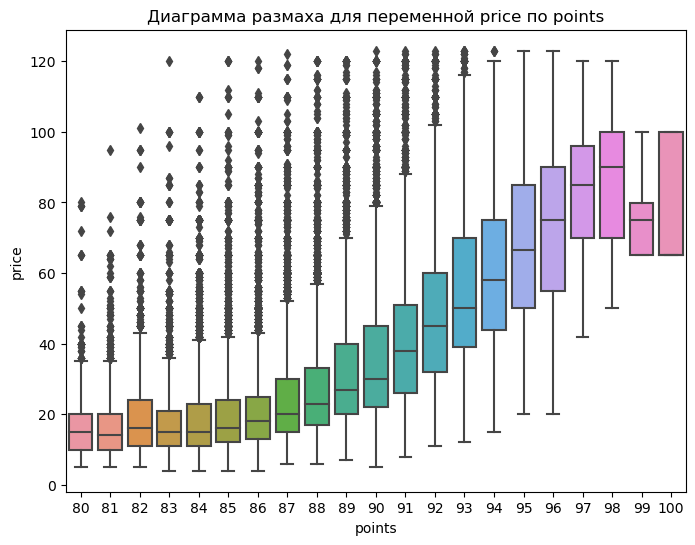

In [47]:
# Гистограмма для переменной points
plt.figure(figsize=(8, 6))
plt.title('Гистограмма для points')
sns.histplot(data=wine_dataset_cleaned, x="points", bins=20)
plt.xticks(range(80,101))
plt.show()

# Диаграмма размаха для переменной price по points
plt.figure(figsize=(8, 6))
plt.title('Диаграмма размаха для переменной price по points')
sns.boxplot(x='points', y='price', data=wine_dataset_cleaned)
plt.show()

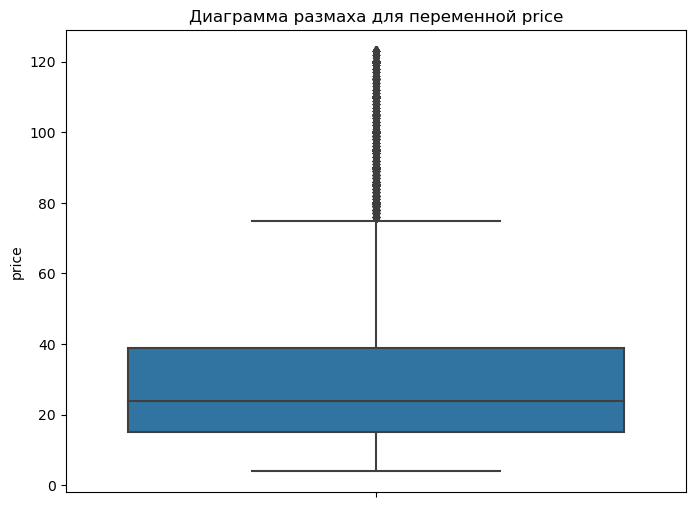

In [48]:
# Диаграмма размаха для переменной price
plt.figure(figsize=(8, 6))
plt.title('Диаграмма размаха для переменной price')
sns.boxplot(y='price', data=wine_dataset_cleaned)
plt.show()

По гистограмме переменной points видно, что результаты являются примером нормального распределения

## 7. Продвинутая визуализация данных
- Постройте диаграмму рассеяния, чтобы визуализировать взаимосвязь между ценой и оценками. 
- Используйте цветовую кодировку, чтобы различать страны.

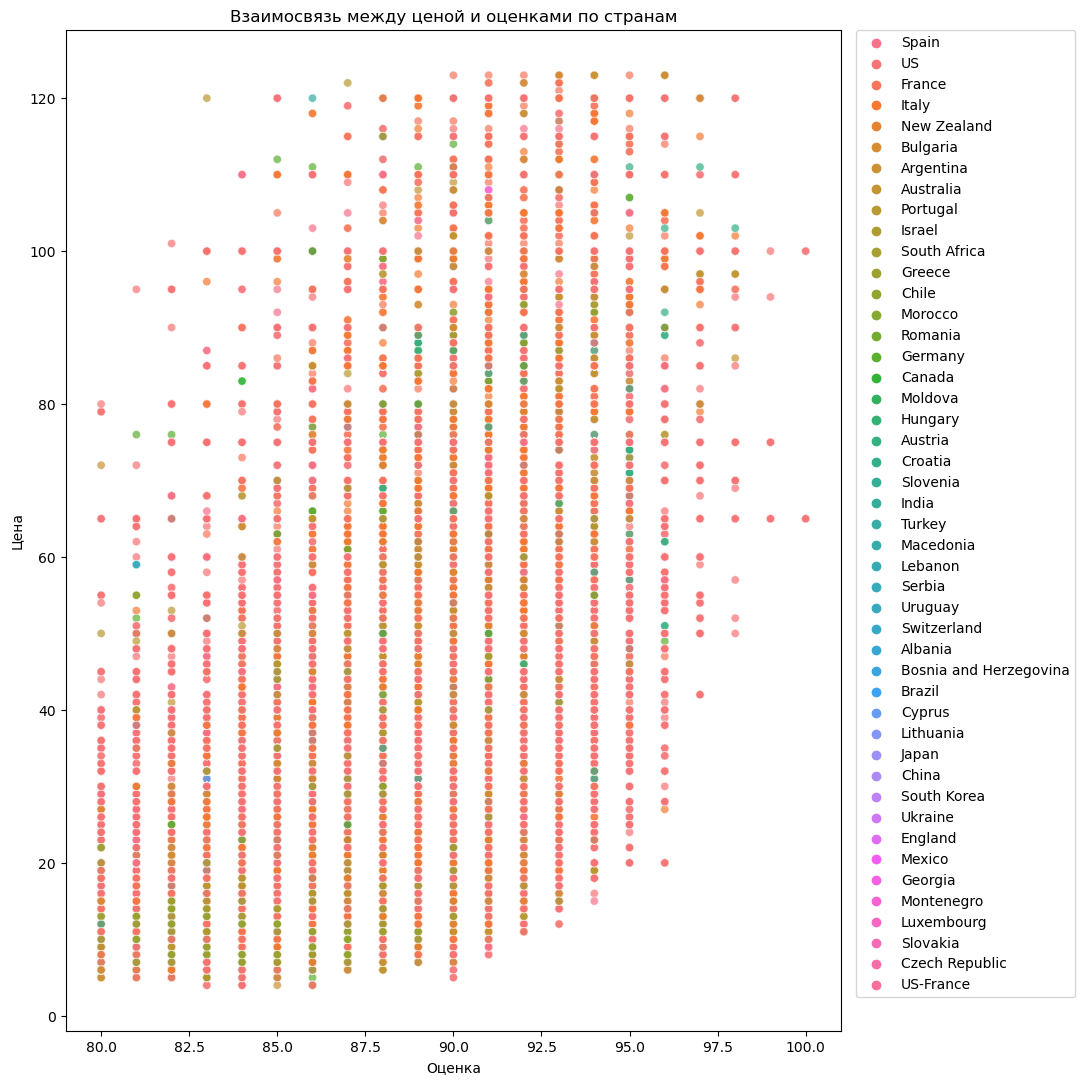

In [49]:
# Диаграмма рассеяния с цветовой кодировкой по странам
plt.figure(figsize=(10, 13))
plt.title('Взаимосвязь между ценой и оценками по странам')
sns.scatterplot(x='points', y='price', data=wine_dataset_cleaned, hue='country', alpha=0.7)
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad=0)
plt.xlabel('Оценка')
plt.ylabel('Цена')
plt.show()

## 8. Введение в тестирование гипотез, непараметрические критерии
- Проведите тест Манна-Уитни для сравнения распределения оценок между винами из США и Франции. 
- Какой можно сделать вывод из результатов?

In [50]:
# Выборка вин из США и Франции
usa_wines = wine_dataset_cleaned[wine_dataset_cleaned['country'] == 'US']
france_wines = wine_dataset_cleaned[wine_dataset_cleaned['country'] == 'France']

# Тест Манна-Уитни
stat, p_value = stats.mannwhitneyu(usa_wines['points'], france_wines['points'], alternative='greater')
print(f"Статистика теста Манна-Уитни: {stat:.2f}")
print(f"Значение p: {p_value}")

Статистика теста Манна-Уитни: 386633317.00
Значение p: 1.0


## 9. Параметрические критерии для тестирования гипотез
- Выполните t-тест для сравнения средней цены вин из Калифорнии и Орегона. 
- Существенно ли они различаются?

In [51]:
# Выборка вин из Калифорнии и Орегона
california_wines = wine_dataset_cleaned[wine_dataset_cleaned['province'] == 'California'].dropna(subset=['price'])
oregon_wines = wine_dataset_cleaned[wine_dataset_cleaned['province'] == 'Oregon'].dropna(subset=['price'])

# Т-тест
stat, p_value = stats.ttest_ind(california_wines['price'], oregon_wines['price'], alternative='greater')
print(f"Статистика t-теста: {stat:.2f}")
print(f"Значение p: {p_value:.4f}")

Статистика t-теста: -1.17
Значение p: 0.8792


## 10. Линейная регрессия
- Постройте модель линейной регрессии для прогнозирования цены на основе оценок. 
- Каково значение R² и как оно интерпретируется?

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                          3.271e+05
Date:                Sat, 08 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:55:30   Log-Likelihood:                     -7.1120e+05
No. Observations:              134760   AIC:                                  1.422e+06
Df Residuals:                  134759   BIC:                                  1.422e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

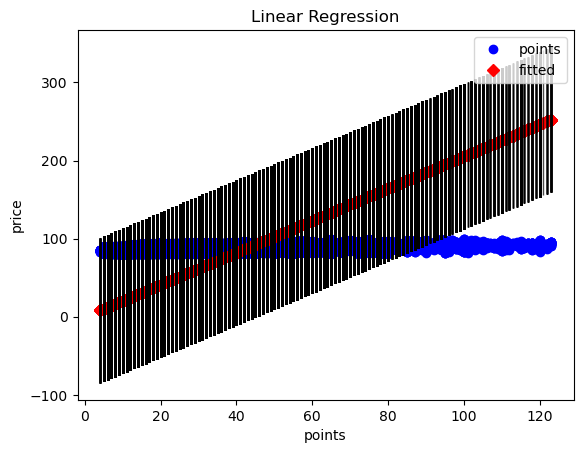

In [52]:
from sklearn.linear_model import LinearRegression

# Подготовка данных
X = wine_dataset_cleaned[['points']]
y = wine_dataset_cleaned['price']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели линейной регрессии
model = sm.OLS(X,y)
results = model.fit()

print(results.summary())

# Построение графика
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("price")
ax.set_xlabel("points")
ax.set_title("Linear Regression")

print("R^2 = ", results.rsquared)

# res = regression_model_adequacy_check(results, p_level=0.95, model_name='linear_ols')
# print(res)

0 < 0.71 < 1 - Результат неплохой, поэтому линейную регрессию можно использовать

## 11. Логистическая регрессия
- Используя логистическую регрессию, предскажите, является ли вино из США на основе его оценок и цены. 
- Обсудите точность модели.

In [53]:
'''
from sklearn.linear_model import LogisticRegression

# Разделение на входные данные (X) и целевую переменную (y)
X = wine_dataset_cleaned[['points', 'price']]
y = (wine_dataset_cleaned['country'] == 'US').astype(int)

# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Оценка модели
accuracy = model.score(X, y)
print(f"Точность модели: {accuracy:.2f}")
'''

'\nfrom sklearn.linear_model import LogisticRegression\n\n# Разделение на входные данные (X) и целевую переменную (y)\nX = wine_dataset_cleaned[[\'points\', \'price\']]\ny = (wine_dataset_cleaned[\'country\'] == \'US\').astype(int)\n\n# Создание и обучение модели логистической регрессии\nmodel = LogisticRegression()\nmodel.fit(X, y)\n\n# Оценка модели\naccuracy = model.score(X, y)\nprint(f"Точность модели: {accuracy:.2f}")\n'

In [54]:
from sklearn.linear_model import LogisticRegression

# Разделение на входные данные (X) и целевую переменную (y)
X = wine_dataset_cleaned[['points', 'price']]
y = (wine_dataset_cleaned['country'] == 'US').astype(int)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка модели на тестовом наборе
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.55


## 12. Задача классификации
- Постройте классификатор дерева решений, чтобы различать красные и белые вина, используя подходящие характеристики из набора данных.

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение на входные данные (X) и целевую переменную (y)
X = wine_dataset_cleaned[['points', 'price']]
y = (wine_dataset_cleaned['variety'].str.contains('Red')).astype(int)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение классификатора дерева решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность классификатора дерева решений: {accuracy:.2f}")

Точность классификатора дерева решений: 0.88
